In [209]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [210]:
metadata=pd.read_csv("movie_metadata_with_score_metacritic.csv", index_col="Unnamed: 0") #reading in metacritic dataset
metadata=metadata.loc[~metadata["metacritic_metascore"].isna()] #removing rows with no metacritic data
metadata=metadata.drop(["homepage","keywords","overview","status","tagline","imdb_metascore","budget","revenue"],1) #dropping unnecessary features
metadata=metadata.drop_duplicates() #dropping duplicates
metadata["release_year"]=metadata.release_date.str[0:4].astype(int) #creating new column with year for comparison


In [211]:
num_data=pd.read_csv("the_numbers_budget.csv") #reading in revenue data
num_data=num_data.rename(columns={"Movie":"title"}) #renaming column to match metadata
num_data["num_year"]=num_data["Release Date"].str[-4:].astype(int)
num_data=num_data.drop_duplicates()#dropping duplicates

In [212]:
critic_revenue=metadata.merge(num_data,on="title") #merging datasets
critic_revenue=critic_revenue.drop_duplicates() #dropping duplicates
critic_revenue=critic_revenue.loc[(critic_revenue["Worldwide Gross"]!=0)] #removing rows with no revenue data
critic_revenue=critic_revenue.loc[(np.abs(critic_revenue.release_year-critic_revenue.num_year)<5)] #removing rows where the years don't match, as this indicates different movies

critic_revenue["log Worldwide Gross"]=np.log(critic_revenue["Worldwide Gross"])#adding column for log of revenue

In [213]:
critic_revenue_big=critic_revenue.loc[critic_revenue['Production Budget'] > 40000000]
critic_revenue_big.shape[0]

940

In [215]:
#Normalizing by the median for merged data set

critic_revenue_big["Production Budget"]=(critic_revenue_big["Production Budget"]-critic_revenue_big["Production Budget"].median())/critic_revenue_big["Production Budget"].std()
critic_revenue_big["Worldwide Gross"]=(critic_revenue_big["Worldwide Gross"]-critic_revenue_big["Worldwide Gross"].median())/critic_revenue_big["Worldwide Gross"].std()
critic_revenue_big["log Worldwide Gross"]=(critic_revenue_big["log Worldwide Gross"]-critic_revenue_big["log Worldwide Gross"].median())/critic_revenue_big["log Worldwide Gross"].std()
critic_revenue_big["Domestic Gross"]=(critic_revenue_big["Domestic Gross"]-critic_revenue_big["Domestic Gross"].median())/critic_revenue_big["Domestic Gross"].std()
critic_revenue_big["popularity"]=(critic_revenue_big["popularity"]-critic_revenue_big["popularity"].median())/critic_revenue_big["popularity"].std()
critic_revenue_big["vote_count"]=(critic_revenue_big["vote_count"]-critic_revenue_big["vote_count"].median())/critic_revenue_big["vote_count"].std()
critic_revenue_big["metacritic_metascore"]=(critic_revenue_big["metacritic_metascore"]-critic_revenue_big["metacritic_metascore"].median())/critic_revenue_big["metacritic_metascore"].std()
critic_revenue_big["runtime"]=(critic_revenue_big["runtime"]-critic_revenue_big["runtime"].median())/critic_revenue_big["runtime"].std()

# Reindex since the dataset has been subset many times
critic_revenue_big.index=range(len(critic_revenue_big))

/Users/tatenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tatenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tatenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [216]:
critic_revenue_big

,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,vote_average,vote_count,metacritic_metascore,release_year,Release Date,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,2.348561,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.159092,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,7.2,5.634289,1.899512,2009,12/18/2009,7.466915,7.372033,9.906104,2009,2.687705
1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,1.491564,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,1.529357,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",...,6.3,1.821604,0.490197,2015,11/6/2015,4.837720,1.346944,2.715831,2015,1.597580
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,1.589803,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,2.294036,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.6,4.233775,1.593139,2012,7/20/2012,4.311881,4.013832,3.492274,2012,1.796112
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,0.228784,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,0.809660,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.1,0.604082,-0.061275,2012,3/9/2012,4.311881,-0.018569,0.453265,2012,0.521274
4,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,en,Tangled,0.323418,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,-0.629735,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.4,1.231039,1.164217,2010,11/24/2010,3.996377,1.354983,1.604555,2010,1.213127
5,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,en,Avengers: Age of Ultron,2.026977,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1.214490,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.3,3.017812,0.857844,2015,5/1/2015,5.481347,4.130658,4.707704,2015,2.041770
6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,en,Batman v Superman: Dawn of Justice,2.455094,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,1.664300,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,5.7,3.141020,-0.490197,2016,3/25/2016,3.786042,2.747619,2.671460,2016,1.584875
7,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1452,en,Superman Returns,0.507385,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,1.799244,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,5.4,0.227701,1.225492,2006,6/28/2006,3.407437,1.347437,0.799400,2006,0.786665
8,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",10764,en,Quantum of Solace,1.502550,"[{""name"": ""Eon Productions"", ""id"": 7576}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-10-30,-0.359849,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.1,1.041288,0.367647,2008,11/14/2008,3.365370,1.016834,1.624324,2008,1.221523
9,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",57201,en,The Lone Ranger,0.330681,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-03,1.574338,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,5.9,0.701297,-0.919119,2013,7/2/2013,4.311881,0.156060,0.366924,2013,

In [217]:
critic_revenue_big.head()

,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,vote_average,vote_count,metacritic_metascore,release_year,Release Date,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,2.348561,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.159092,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,7.2,5.634289,1.899512,2009,12/18/2009,7.466915,7.372033,9.906104,2009,2.687705
1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,1.491564,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,1.529357,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",...,6.3,1.821604,0.490197,2015,11/6/2015,4.837720,1.346944,2.715831,2015,1.597580
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,1.589803,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,2.294036,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.6,4.233775,1.593139,2012,7/20/2012,4.311881,4.013832,3.492274,2012,1.796112
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,0.228784,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,0.809660,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.1,0.604082,-0.061275,2012,3/9/2012,4.311881,-0.018569,0.453265,2012,0.521274
4,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,en,Tangled,0.323418,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,-0.629735,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.4,1.231039,1.164217,2010,11/24/2010,3.996377,1.354983,1.604555,2010,1.213127


In [218]:
critic_revenue_big.describe()

,id,popularity,runtime,vote_average,vote_count,metacritic_metascore,release_year,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,40892.269149,0.220580,0.099054,6.230745,0.353638,0.068771,2005.491489,0.362655,0.298526,0.319077,2005.503191,-0.062290
std,68792.292052,1.000000,1.000000,0.777562,1.000000,1.000000,6.689439,1.000000,1.000000,1.000000,6.694218,1.000000
min,12.000000,-0.616520,-1.754263,3.400000,-0.486593,-2.450983,1963.000000,-0.609973,-0.797347,-0.605506,1963.000000,-3.648339
25%,3661.000000,-0.270693,-0.674716,5.700000,-0.277608,-0.674020,2001.000000,-0.315503,-0.379971,-0.317220,2001.000000,-0.681817
50%,10194.000000,0.000000,0.000000,6.200000,0.000000,0.000000,2006.000000,0.000000,0.000000,0.000000,2006.000000,0.000000
75%,45481.000000,0.384970,0.629735,6.700000,0.567432,0.796570,2011.000000,0.631007,0.610761,0.565384,2011.000000,0.615616
max,417859.000000,16.780393,6.027467,8.300000,6.649064,2.696082,2016.000000,7.466915,7.372033,9.906104,2016.000000,2.687705


In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

In [220]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

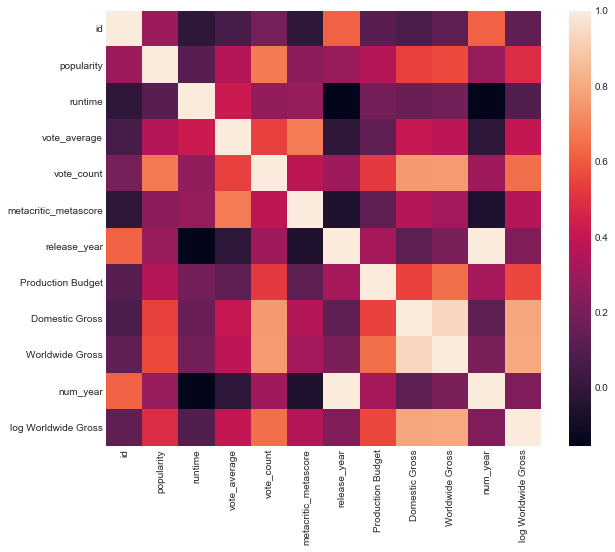

In [221]:
sns.heatmap(critic_revenue_big.corr(), vmax=1, square=True)

In [222]:
#Defining features and target for this dataset based on co-relation
features = ['Production Budget']
target = ['Worldwide Gross']

In [223]:
#splitting data set into training and test data set in 0.7/0.3
train, test = train_test_split(critic_revenue_big,test_size=0.30)
train.head()

,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,vote_average,vote_count,metacritic_metascore,release_year,Release Date,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
98,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",604,en,The Matrix Reloaded,0.763331,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2003-05-15,1.079546,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.7,1.289783,0.612746,2003,5/15/2003,1.682685,2.222912,2.181148,2003,1.431827
168,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",49040,en,The Bourne Legacy,1.152433,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-08,0.269887,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.0,0.878051,0.551471,2012,8/10/2012,1.156846,0.413022,0.444083,2012,0.513115
105,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,en,The Wolfman,-0.223239,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,-0.539773,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,5.5,-0.214704,-0.551471,2010,2/12/2010,1.682685,-0.135417,-0.078004,2010,-0.127811
747,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",11817,en,Bulletproof Monk,-0.342801,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-03-28,-0.449811,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,5.1,-0.355587,-0.735295,2003,4/16/2003,-0.378604,-0.556624,-0.531485,2003,-1.858060
96,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",605,en,The Matrix Revolutions,0.813643,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-05,0.674716,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.4,1.109390,-0.306373,2003,11/5/2003,1.682685,0.693263,1.001133,2003,0.912809


In [224]:
#Fill the training and test data with require information
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [225]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [226]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)

In [227]:
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.3826561966628534
Testing score:  0.43390743534902587


In [228]:
yPrediction = lin.predict(X_test)


In [229]:
#Calculate root-mean-square error (RMSE):
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(yPrediction, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.6682


In [230]:
#Calculate mean absolute error (MAE):
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(yPrediction, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 0.4603


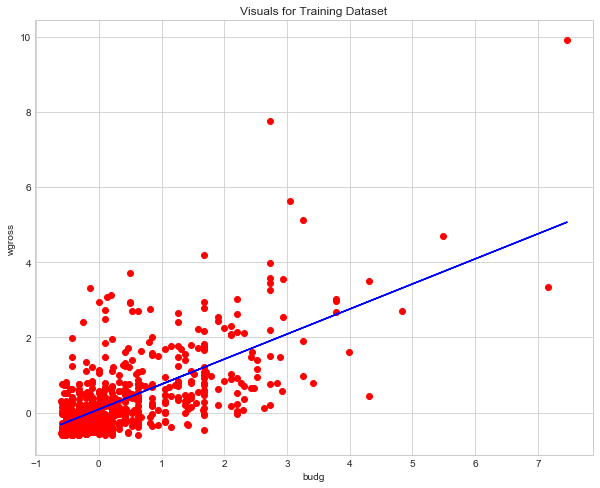

In [231]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("budg")
plt.ylabel("wgross")
plt.show()

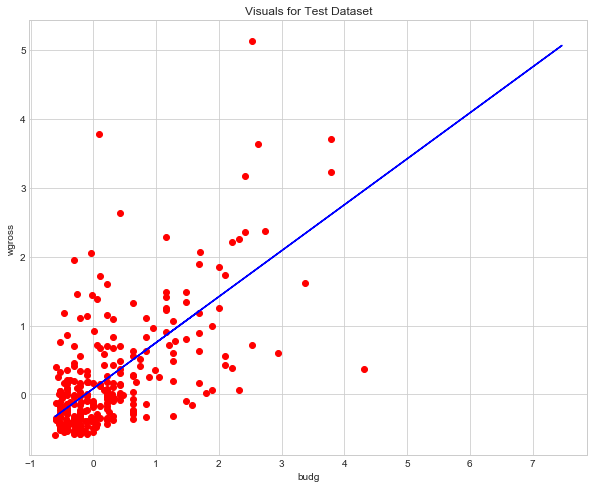

In [232]:
plt.scatter(X_test, y_test , color = 'red')
plt.plot(X_train, lin.predict(X_train), color = 'blue')
plt.title ("Visuals for Test Dataset")
plt.xlabel("budg")
plt.ylabel("wgross")
plt.show()

In [233]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [234]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)

Training score:  0.28777875476037107
Testing score:  0.448509110812773
